## A CLASSIFICATION PROJECT - PREDICTING EMPLOYEE ATTRITION

#### BUSINESS UNDERSTANDING

Employee attrition refers to the process where employees leave an organization, either voluntarily or involuntarily. High attrition rates can be costly for businesses, as they impact productivity, morale, recruitment costs, and training expenses. 
The primary objective of predicting employee attrition is to identify employees who are at risk of leaving the organization in the near future. By doing so, companies can take proactive measures to improve retention, enhance employee satisfaction, and reduce the overall cost of turnover.

##### PROJECT GOAL
The goal of this project is to develop a robust machine learning pipeline to predict whether specific employees are likely to leave the company. The predictive modeling will be conducted following an in-depth analysis of the dataset obtained. 

##### ANALYTICAL QUESTIONS
1. What is the percentage of Attrition?
2. How satisfied are employees after 3 years at the company?
3. Does marital status affect attrition rate?

#### DATA UNDERSTANDING

#### Data Features
* Age: Age of employees

* Attrition: Employee attrition status

* Department: Department of employees

* Education Level: 1-Bachelor's degree; 2- Master's degree

* EducationField

* Environment Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;

* Job Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;

* MaritalStatus

* Gross Salary

* Work Life Balance: 1-Bad; 2-Good; 3-Better; 4-Best;

* Length of Service: number of years with employer


#### Loading the Necessary Libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Data Preparation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

#Model Persistance
import joblib

In [11]:
#Load the dataset
data = pd.read_excel('Data/Attrition Dataset.xlsx')
data.head()

,Employee ID,Age,Department,Education Level,EducationField,Environment Satisfaction,Job Satisfaction,Marital Status,Gross Salary,Work Life Balance,Length of Service,Attrition
0,1001,41,Personal Finance,2,Finance,2,4,Single,5993.0,1,6,Yes
1,1002,37,Personal Finance,1,Finance,4,3,Single,2090.0,3,7,Yes
2,1003,33,Personal Finance,1,Finance,4,3,Married,2909.0,3,8,No
3,1004,27,Personal Finance,1,Finance,1,2,Married,3468.0,3,2,No
4,1005,32,Personal Finance,1,Finance,4,4,Single,3068.0,2,7,Yes


In [12]:
#Check cell values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               302 non-null    int64  
 1   Age                       302 non-null    int64  
 2   Department                302 non-null    object 
 3   Education Level           302 non-null    int64  
 4   EducationField            302 non-null    object 
 5   Environment Satisfaction  302 non-null    int64  
 6   Job Satisfaction          302 non-null    int64  
 7   Marital Status            302 non-null    object 
 8   Gross Salary              299 non-null    float64
 9   Work Life Balance         302 non-null    int64  
 10  Length of Service         302 non-null    int64  
 11  Attrition                 302 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 28.4+ KB


In [13]:
#Check for null values
data.isna().sum()

Employee ID                 0
Age                         0
Department                  0
Education Level             0
EducationField              0
Environment Satisfaction    0
Job Satisfaction            0
Marital Status              0
Gross Salary                3
Work Life Balance           0
Length of Service           0
Attrition                   0
dtype: int64

In [14]:
#Remove the Employee ID column
data = data.drop('Employee ID', axis=1)

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,302.0,32.324503,5.047350,21.0,29.0,32.0,36.0,53.0
Education Level,302.0,1.066225,0.249088,1.0,1.0,1.0,1.0,2.0
Environment Satisfaction,302.0,2.688742,1.070197,1.0,2.0,3.0,4.0,4.0
Job Satisfaction,302.0,2.847682,1.070587,1.0,2.0,3.0,4.0,4.0
Gross Salary,299.0,5163.217391,3393.744928,1009.0,2703.0,4200.0,6372.0,19272.0
Work Life Balance,302.0,2.774834,0.688512,1.0,2.0,3.0,3.0,4.0
Length of Service,302.0,4.271523,2.719277,1.0,2.0,4.0,6.0,13.0


In [16]:
data.describe(include='object').T

,count,unique,top,freq
Department,302,13,Tech Department,39
EducationField,302,8,Finance,84
Marital Status,302,2,Married,157
Attrition,302,2,No,156


In [17]:
#Check for duplicates
data.duplicated().sum()

np.int64(0)

* This implies there are no duplicates in the dataset

In [18]:
# Print unique values for each column
for column in data.columns:
    print(f'Column Name: {column}\n')
    print(f'Number of Unique Values: {data[column].unique().size}\n')
    print(f'{data[column].unique()}')
    print('=' * 80)

Column Name: Age

Number of Unique Values: 27

[41 37 33 27 32 30 38 36 35 29 31 34 28 22 53 24 21 46 39 50 26 23 40 25
 43 45 42]
Column Name: Department

Number of Unique Values: 13

['Personal Finance' 'Tech Department' 'Brokerage' 'Management'
 'Client Services' 'Legal and Admin' 'Customer Service' 'Portfolio'
 'Human Resource' 'Marketing Department' 'Human Resources'
 'Strategic Initiatives' 'Relationship Mgt']
Column Name: Education Level

Number of Unique Values: 2

[2 1]
Column Name: EducationField

Number of Unique Values: 8

['Finance' 'Computer Science' 'Business Mgt' 'Business Admin' 'Law'
 'Social Science' 'Human Resources' 'Marketing']
Column Name: Environment Satisfaction

Number of Unique Values: 4

[2 4 1 3]
Column Name: Job Satisfaction

Number of Unique Values: 4

[4 3 2 1]
Column Name: Marital Status

Number of Unique Values: 2

['Single' 'Married']
Column Name: Gross Salary

Number of Unique Values: 290

[ 5993.  2090.  2909.  3468.  3068.  2693.  9526.  5237.  242

#### Univariate Analysis

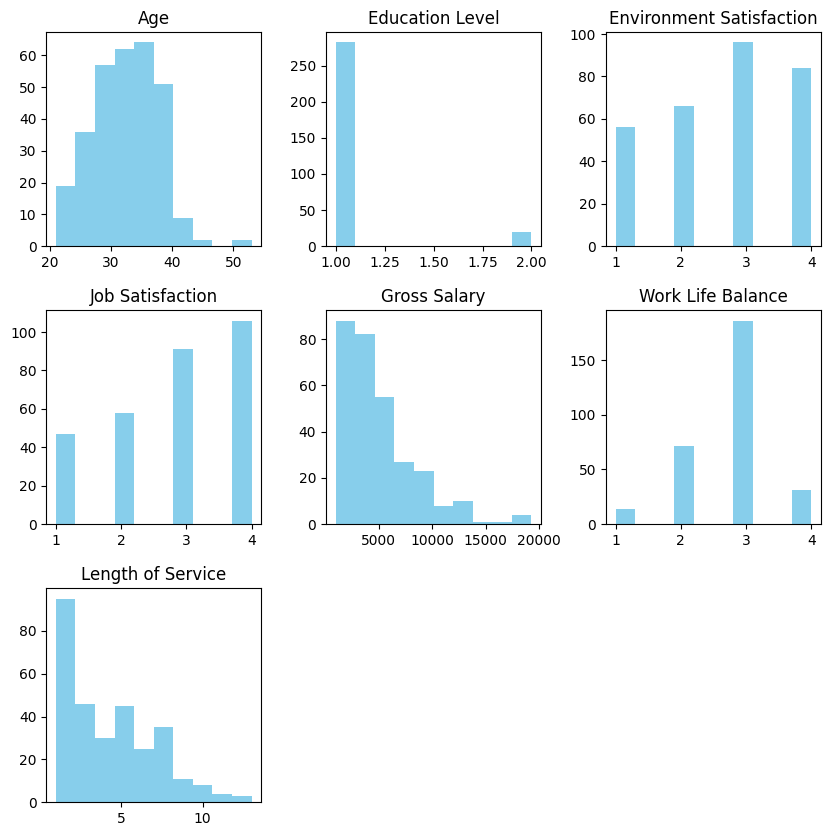

In [19]:
#setting color palette for the project
sns.color_palette("pastel")
data.hist(figsize=(10, 10), grid=False, color='skyblue')
plt.show()

* Add KDE plots to see a smoother representation of the distribution of the features

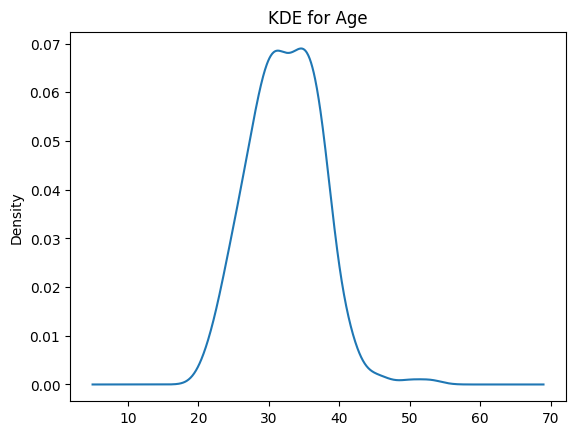

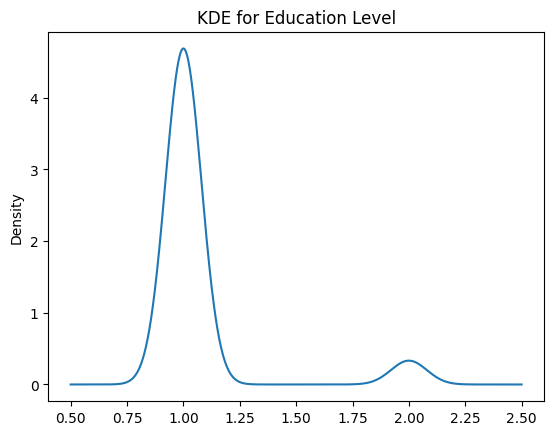

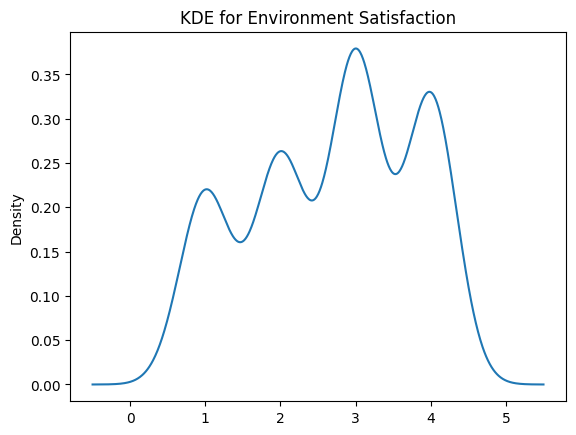

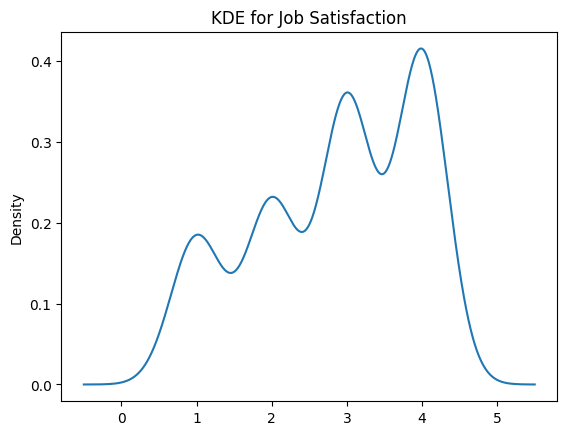

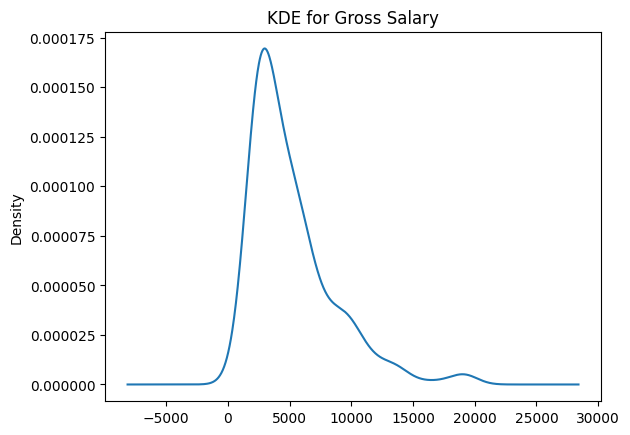

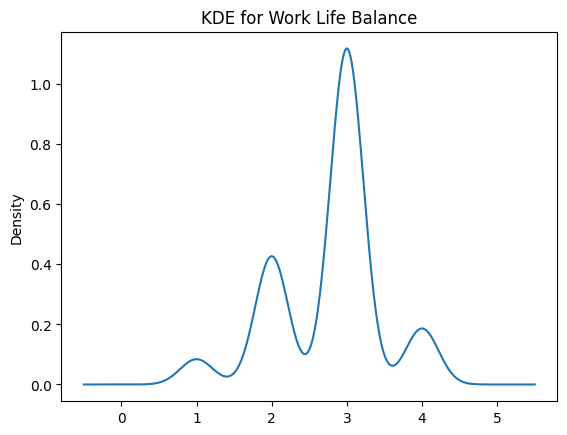

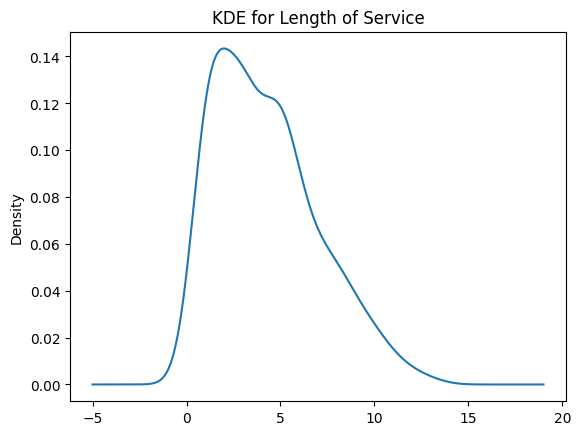

In [20]:
for column in data.select_dtypes('number').columns:
    data[column].plot(kind='kde')
    plt.title(f'KDE for {column}')
    plt.show()

* Add a Boxplot to detect outliers and the scale of the data

<Axes: >

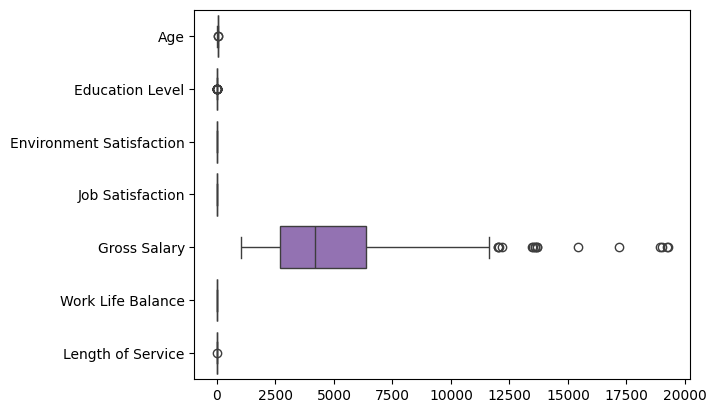

In [21]:
sns.boxplot(data=data, orient='h')

<Axes: xlabel='Gross Salary'>

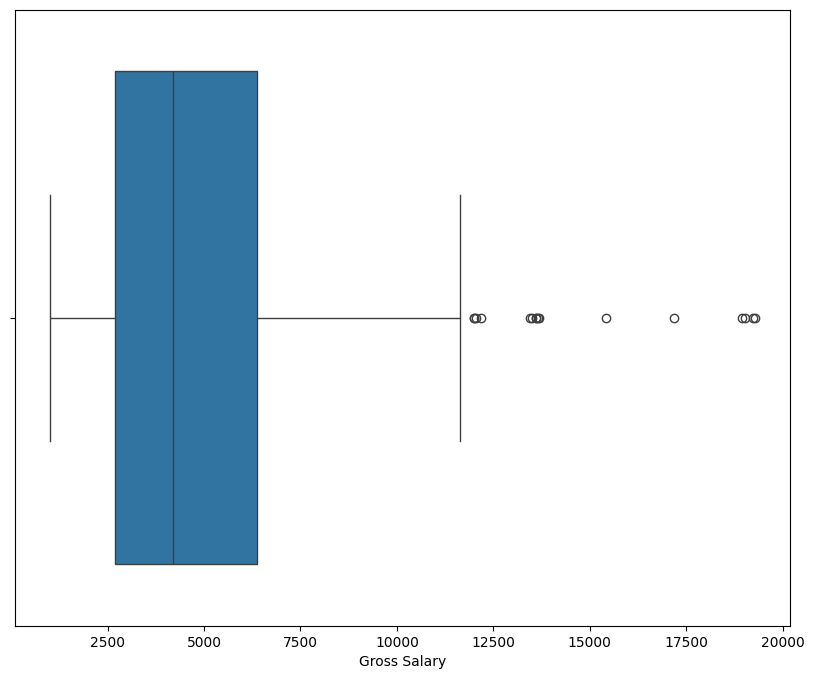

In [22]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data['Gross Salary'], orient='h')

<Axes: xlabel='Age'>

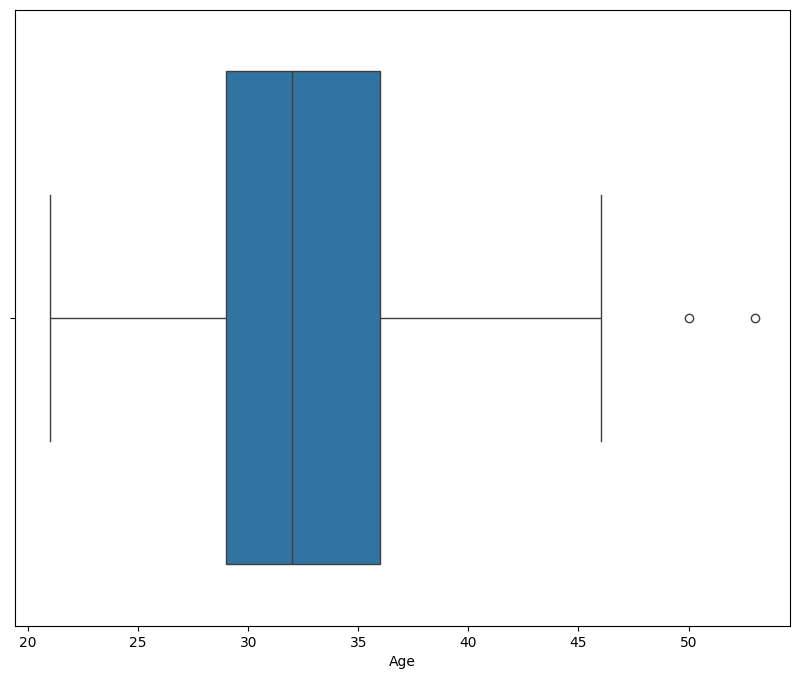

In [23]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data['Age'], orient='h')

#### Bi-variate Analysis

In [24]:
correlation = data.corr(numeric_only=True)
correlation

,Age,Education Level,Environment Satisfaction,Job Satisfaction,Gross Salary,Work Life Balance,Length of Service
Age,1.000000,0.355444,-0.019372,0.033155,0.395338,0.079411,0.507445
Education Level,0.355444,1.000000,0.040195,0.025494,0.276792,-0.028993,0.140130
Environment Satisfaction,-0.019372,0.040195,1.000000,0.048373,-0.082508,0.017289,-0.032509
Job Satisfaction,0.033155,0.025494,0.048373,1.000000,-0.006306,-0.051190,0.045066
Gross Salary,0.395338,0.276792,-0.082508,-0.006306,1.000000,0.043759,0.393477
Work Life Balance,0.079411,-0.028993,0.017289,-0.051190,0.043759,1.000000,0.000823
Length of Service,0.507445,0.140130,-0.032509,0.045066,0.393477,0.000823,1.000000


<Axes: >

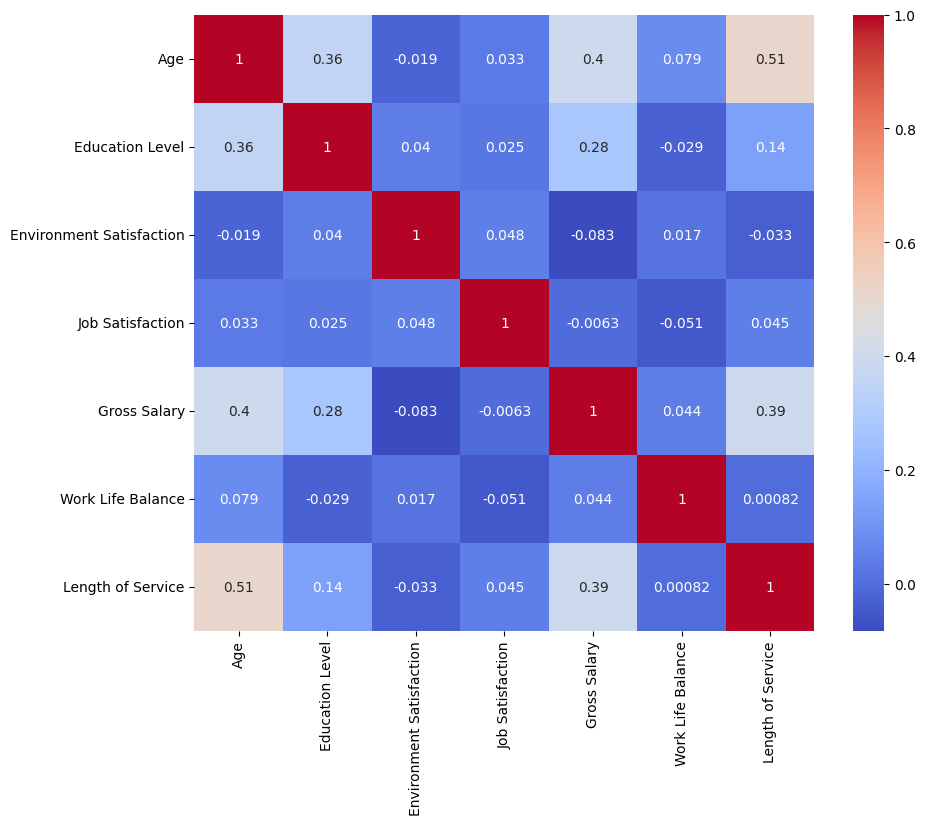

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation, annot=True, cmap='coolwarm')

#### Multivariate Analysis

<Figure size 1600x800 with 0 Axes>

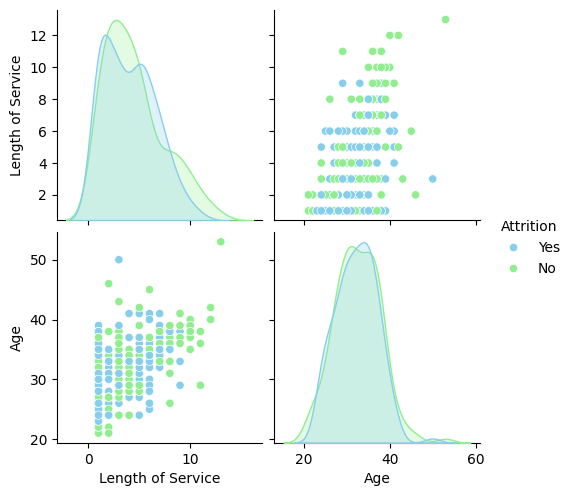

In [26]:
df = data[['Attrition', 'Length of Service', 'Age']]
plt.figure(figsize=(16, 8))
sns.pairplot(df, hue='Attrition', palette={'Yes': 'skyblue', 'No': 'lightgreen'})
plt.show()

#### Answering Analytical Questions

1. What is the percentage of Attrition?

Text(0.5, 1.0, 'The Attrition distribution')

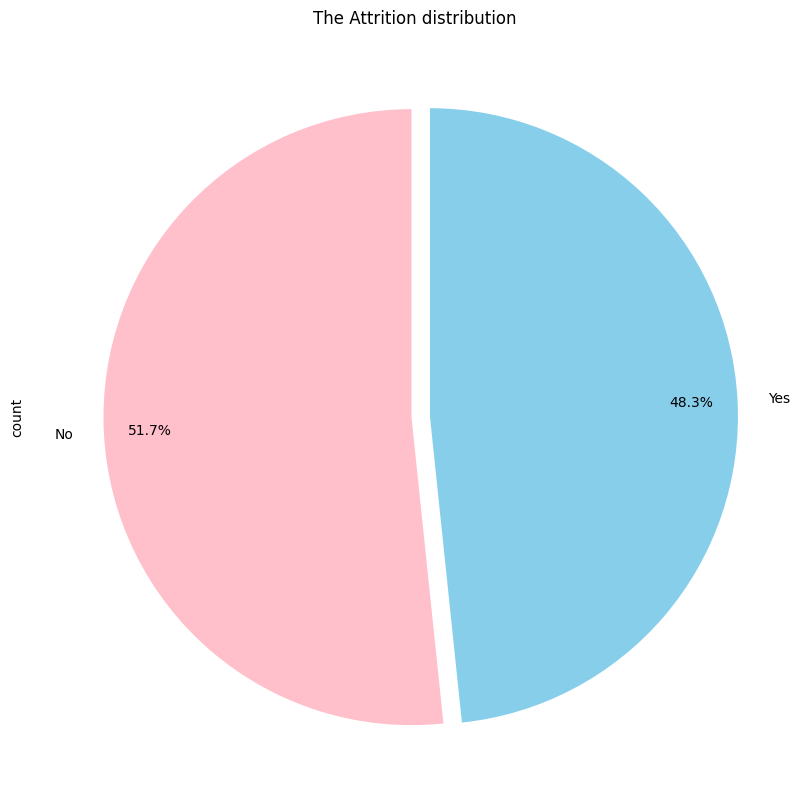

In [27]:
plt.figure(figsize=(10, 10))
data['Attrition'].value_counts().plot.pie(startangle=90, colors=['pink', 'skyblue'], autopct='%1.1f%%', explode=(0.01, 0.05), pctdistance=0.85)
plt.title('The Attrition distribution')

#### How satisfied are employees after 3 years at the company?

In [28]:
data.columns

Index(['Age', 'Department', 'Education Level', 'EducationField',
       'Environment Satisfaction', 'Job Satisfaction', 'Marital Status',
       'Gross Salary', 'Work Life Balance', 'Length of Service', 'Attrition'],
      dtype='object')

In [29]:
data.groupby(['Job Satisfaction', 'Attrition'])['Department'].count().rename('Total').reset_index()

,Job Satisfaction,Attrition,Total
0,1,No,16
1,1,Yes,31
2,2,No,32
3,2,Yes,26
4,3,No,41
5,3,Yes,50
6,4,No,67
7,4,Yes,39


In [30]:
after_three_years = data[data['Length of Service'] > 3]
after_three_years.shape

(161, 11)

In [31]:
after_three_years[['Job Satisfaction', 'Attrition']].groupby(['Job Satisfaction', 'Attrition'])['Attrition'].count().rename('Count').reset_index()

,Job Satisfaction,Attrition,Count
0,1,No,6
1,1,Yes,18
2,2,No,15
3,2,Yes,17
4,3,No,23
5,3,Yes,24
6,4,No,41
7,4,Yes,17


#### Does marital status affect attrition rate?

In [32]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Calculate the total count and attrition count by marital status
marital_status_summary = data.groupby('Marital Status')['Attrition'].value_counts().unstack().fillna(0)

# Calculate the attrition rate
marital_status_summary['Attrition Rate'] = marital_status_summary['Yes'] / (marital_status_summary['Yes'] + marital_status_summary['No'])

# Reset index for better readability
marital_status_summary = marital_status_summary.reset_index()

print(marital_status_summary)

Attrition Marital Status  No  Yes  Attrition Rate
0                Married  87   70        0.445860
1                 Single  69   76        0.524138


<Figure size 1000x600 with 0 Axes>

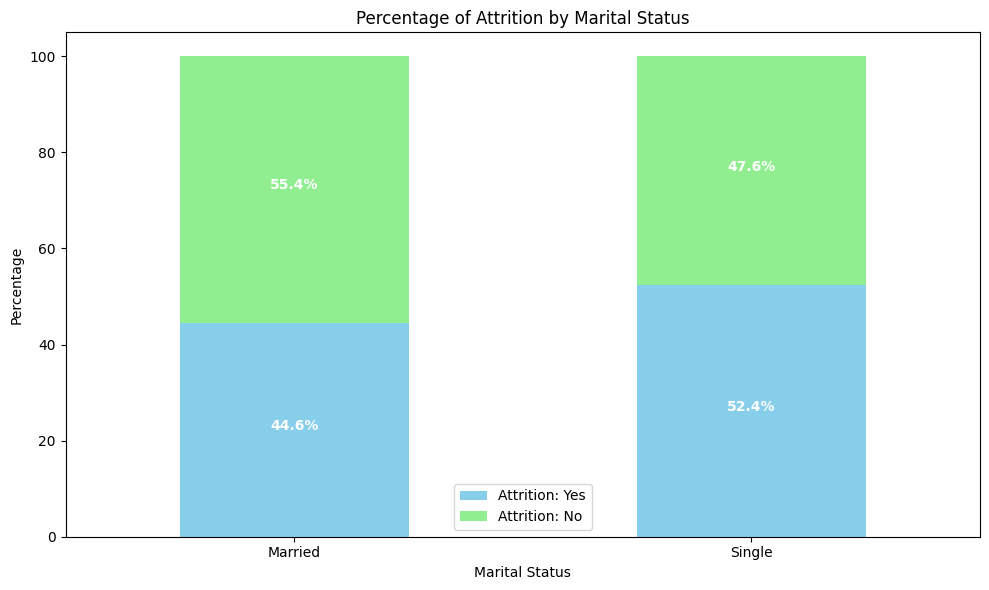

In [36]:
import matplotlib.pyplot as plt

# Calculate the total count of attrition (Yes + No) for each marital status
marital_status_summary['Total'] = marital_status_summary['Yes'] + marital_status_summary['No']

# Calculate the percentage of Yes and No attrition
marital_status_summary['Yes_pct'] = marital_status_summary['Yes'] / marital_status_summary['Total'] * 100
marital_status_summary['No_pct'] = marital_status_summary['No'] / marital_status_summary['Total'] * 100

# Create a stacked bar chart to visualize the percentages of 'Yes' and 'No' attrition by marital status
plt.figure(figsize=(10, 6))
marital_status_summary[['Yes_pct', 'No_pct']].plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen'], figsize=(10, 6))

# Add percentage labels on each bar
for i in range(len(marital_status_summary)):
    plt.text(i, marital_status_summary['Yes_pct'].iloc[i] / 2, f"{marital_status_summary['Yes_pct'].iloc[i]:.1f}%", ha='center', color='white', fontweight='bold')
    plt.text(i, marital_status_summary['Yes_pct'].iloc[i] + marital_status_summary['No_pct'].iloc[i] / 2, f"{marital_status_summary['No_pct'].iloc[i]:.1f}%", ha='center', color='white', fontweight='bold')

plt.title('Percentage of Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(marital_status_summary)), labels=marital_status_summary['Marital Status'], rotation=0)
plt.legend(['Attrition: Yes', 'Attrition: No'])
plt.tight_layout()
plt.show()
